In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
pvals0 = pd.read_csv("Corrected_Pvals_10700_2.csv")
pvals1 = pd.read_csv("Corrected_Pvals_10700_2_prac2x.csv")

<IPython.core.display.Javascript object>


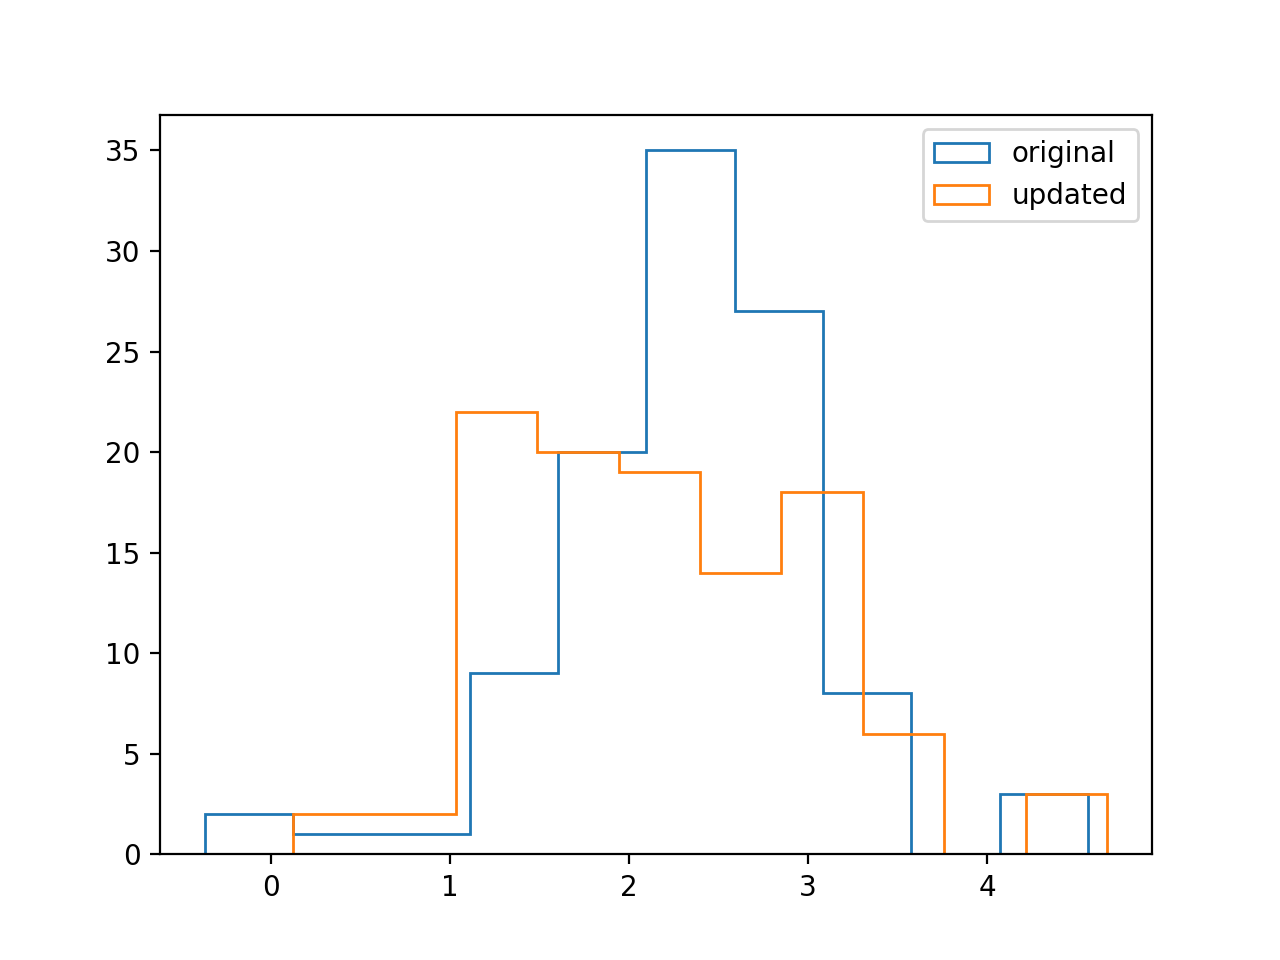

In [5]:
plt.hist(np.log(pvals0.SAFE.values), histtype='step', label='original')
plt.hist(np.log(pvals1.SAFE.values), histtype='step', label='updated')
plt.legend(loc='best')
plt.show()

In [3]:
from astropy.io import fits
import glob
filenames = [f for f in glob.glob("*.fits")]
filenames = np.array(filenames)[np.argsort(np.array([float(f.split("10700_")[1].split(".fits")[0]) for f in filenames]))]
filenames = list(np.array(filenames)[np.where(np.array([len(s.split('f')) for s in filenames]) == 2)[0]])
SPECTRA = [fits.open(f) for f in filenames]

## Is the SAFE associated with measureable weather/instrumental effects?

In [4]:
SPECTRA[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7920                                                  
NAXIS2  =                   86                                                  
EXTEND  =                    T                                                  
SITELONG= '-111.422515'        / East longitude site, decimal degrees           
SITELAT = '34.744305'          / Latitude of site, decimal degrees              
SITEELEV= '2337.0  '           / Elevation of observatory site (meters)         
TELESCP = 'DCT     '           / Name of telescope                              
INSTRMNT= 'EXPRES  '           / Name of instrument                             
DETECTOR= 'STA1600 '           / Detector type                                  
FPA     = 'EXPRES-D0'       

In [6]:
crytemp0 = np.array([float(spec[0].header["CRYTEMP0"]) for spec in SPECTRA])
crytemp1 = np.array([float(spec[0].header["CRYTEMP1"]) for spec in SPECTRA])
crytemp2 = np.array([float(spec[0].header["CRYTEMP2"]) for spec in SPECTRA])
crypress = np.array([float(spec[0].header["CRYPRESS"]) for spec in SPECTRA])
mjd = np.array([float(spec[0].header["TELMJD"]) for spec in SPECTRA])
moondist = np.array([float(spec[0].header["MOONDIST"]) for spec in SPECTRA])
sundist = np.array([float(spec[0].header["SUNDIST"]) for spec in SPECTRA])
airmass = np.array([float(spec[0].header["AIRMASS"]) for spec in SPECTRA])
exptime = np.array([float(spec[0].header["AEXPTIME"]) for spec in SPECTRA])

In [7]:
SAFE = pd.read_csv("Corrected_Pvals_10700_2.csv")
SAFE["CRYTEMP0"] = crytemp0
SAFE["CRYTEMP1"] = crytemp1
SAFE["CRYTEMP2"] = crytemp2
SAFE["CRYPRESS"] = crypress
SAFE["MJD"] = mjd
SAFE["MOONDIST"] = moondist
SAFE["SUNDIST"] = sundist
SAFE["AIRMASS"] = airmass
SAFE["EXPTIME"] = exptime

<IPython.core.display.Javascript object>


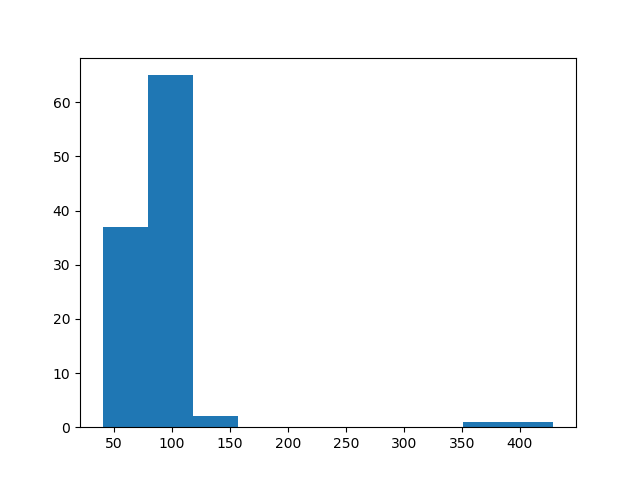

In [8]:
plt.hist(SAFE.EXPTIME.values)
plt.show()

In [21]:
#Bonferroni-corrected p-value cutoff for 0.001 significance level
0.001/SAFE.shape[0]

9.433962264150944e-06

In [7]:
SAFE.Pvals.values

array([6.52754985e-005, 9.99755423e-007, 1.08718139e-009, 3.09648438e-007,
       1.02901611e-007, 5.88159486e-003, 8.70514427e-015, 2.68193175e-017,
       1.02714224e-016, 1.65188830e-089, 4.78204215e-089, 1.72708587e-100,
       4.62953614e-001, 3.95781164e-004, 6.28099587e-001, 8.39586267e-003,
       3.25046678e-001, 5.39743997e-003, 9.52694867e-002, 7.09140872e-004,
       4.23002744e-007, 3.83358072e-019, 6.76082473e-029, 6.14970680e-030,
       2.09260269e-022, 5.35046248e-017, 2.57727294e-024, 4.95864188e-015,
       1.30947780e-013, 1.24559826e-010, 1.23094603e-012, 4.06747382e-010,
       2.22615380e-016, 3.57284787e-018, 1.63476765e-019, 2.25051963e-019,
       5.78717219e-015, 1.97001144e-010, 9.79219105e-021, 3.21395766e-013,
       3.05050640e-019, 1.56575807e-014, 4.57351364e-021, 6.23938687e-018,
       6.41483033e-012, 2.68196721e-022, 1.38421053e-022, 2.25941435e-012,
       4.12692913e-011, 5.31557343e-024, 7.97385267e-035, 4.12243061e-016,
       1.63432932e-009, 1

In [4]:
SAFE.Pvals.values

array([1.24891814e-052, 6.79362231e-073, 4.64821113e-056, 9.47234111e-118,
       4.43286923e-141, 5.58272878e-118, 4.71991875e-074, 1.70493282e-091,
       2.63869476e-073, 6.71047249e-141, 8.20833542e-136, 3.19781636e-167,
       2.25484161e-002, 1.05768220e-003, 8.45875830e-003, 7.01373543e-004,
       1.62585063e-003, 2.68516093e-003, 5.81471617e-040, 2.77432150e-036,
       2.10034095e-016, 2.00019023e-031, 1.03161156e-038, 9.03835041e-031,
       9.38673554e-028, 6.61025604e-054, 2.84395768e-053, 1.20741371e-030,
       3.45463327e-026, 2.55465415e-014, 1.94341539e-022, 1.46316102e-014,
       1.34357526e-017, 6.34547793e-025, 6.11741938e-022, 5.01043210e-022,
       4.76583386e-019, 2.83689351e-030, 2.77874556e-028, 4.70789565e-022,
       2.43661940e-036, 1.55422847e-027, 4.79162238e-047, 4.39082894e-027,
       4.05415023e-016, 2.53397645e-034, 1.54122684e-030, 4.51637717e-154,
       1.23969775e-133, 4.88761911e-098, 5.57832533e-125, 1.31469238e-112,
       6.83764192e-032, 4

In [7]:
vels = pd.read_csv("10700.txt").V.values/100

<IPython.core.display.Javascript object>


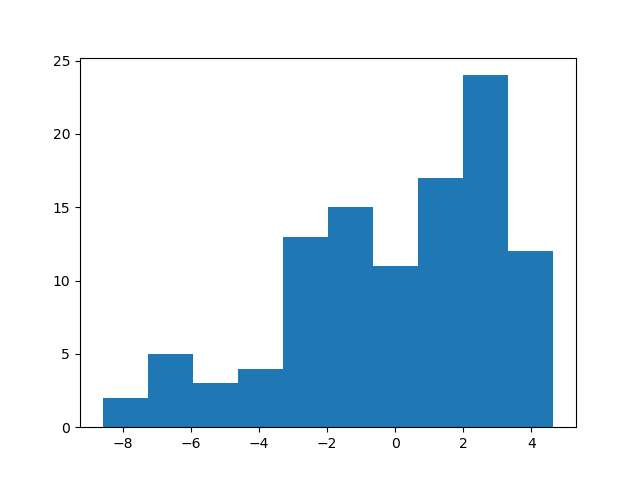

In [16]:
plt.hist(vels - np.mean(vels))
plt.show()

<IPython.core.display.Javascript object>


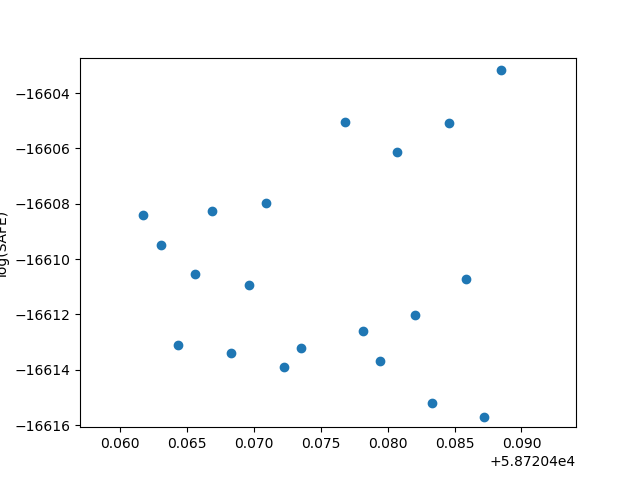

In [10]:
plt.scatter(SAFE.MJD.values, vels)
plt.show()

<IPython.core.display.Javascript object>


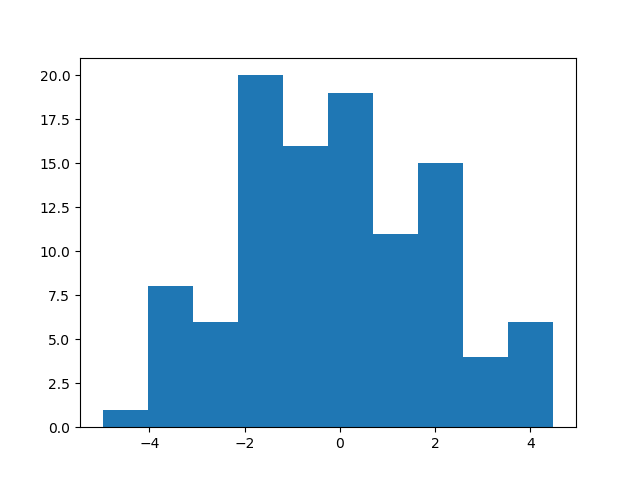

In [11]:
plt.hist(SAFE.t4.values)
plt.show()

In [12]:
SAFE.columns

Index(['Unnamed: 0', 'Pvals', 'SAFE', 'b1', 'b0', 'b2', 'b3', 'b4', 'b5', 't1',
       't0', 't2', 't3', 't4', 't5', 'CRYTEMP0', 'CRYTEMP1', 'CRYTEMP2',
       'CRYPRESS', 'MJD', 'MOONDIST', 'SUNDIST', 'AIRMASS', 'EXPTIME'],
      dtype='object')

In [11]:
plt.scatter(SAFE.CRYTEMP2.values, np.log(SAFE.SAFE.values))
plt.ylabel("log(SAFE)")
plt.show()

<IPython.core.display.Javascript object>

## Is the normalization not accurate enough?  -- this probably isn't the issue
## Is there something that is causing the spectral resolution to vary across observations?
## Are the provided RVs accurate?